In [183]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [184]:
import numpy as np
import pandas as pd
import datetime as dt
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [185]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [186]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [187]:
# Save references to each table

mesaurement = Base.classes.measurement
station = Base.classes.station


In [188]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

Exploratory Precipitation Analysis


In [189]:
# Find the most recent date in the data set.

date = session.query(mesaurement.date).order_by(mesaurement.date.desc()).first()
date

('2017-08-23')

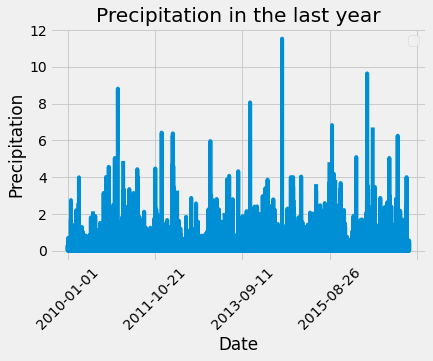

In [190]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
end_date = dt.date(2017,8,23)
start_date = end_date - dt.timedelta(days=365)


# Calculate the date one year from the last date in data set.
twelve_months = session.query(mesaurement).order_by(mesaurement.date.desc()).filter(mesaurement.date >= start_date).all()


# Perform a query to retrieve the data and precipitation scores
precip = session.query(mesaurement.date, mesaurement.prcp)

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(precip, columns=['Date', 'Precipitation']).set_index('Date')

# Sort the dataframe by date

precip_df.sort_values('Date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot()
plt.xticks(rotation=45)
plt.title('Precipitation in the last year')
plt.ylabel("Precipitation")
plt.legend("")
plt.show()

In [191]:
# Use Pandas to calcualte the summary statistics for the precipitation data

summary = precip_df.describe()
summary

,Precipitation
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


Exploratory Station Analysis

In [192]:
# Design a query to calculate the total number stations in the dataset

total_stations = session.query(station).count()
total_stations

9

In [193]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

active_stations = session.query(mesaurement.station, station.name, func.count(mesaurement.station))\
    .filter(mesaurement.station == station.station)\
    .group_by(mesaurement.station)\
    .order_by(func.count(mesaurement.station).desc()).all()

active_stations

[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2724),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2709),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979),
 ('USC00517948', 'PEARL CITY, HI US', 1372),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)]

In [194]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp_query = session.query(mesaurement.station, mesaurement.tobs).filter(mesaurement.station == active_stations[0][0]).all()
temp_query

temps_df = pd.DataFrame(temp_query, columns=['station id', 'temperature']).set_index('station id')
temps_df

lowest = temps_df['temperature'].min()
highest = temps_df['temperature'].max()
avg = temps_df['temperature'].mean()
print(f'The lowest temperature was {lowest}')
print(f'The highest temperature was {highest}')
print(f'The average temperature was {round(avg,1)}')


The lowest temperature was 54.0
The highest temperature was 85.0
The average temperature was 71.7


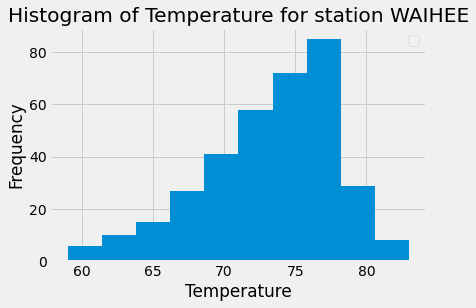

In [199]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


station_year = session.query(mesaurement.tobs, mesaurement.station, mesaurement.date).order_by(mesaurement.date.desc()).filter(mesaurement.station == active_stations[0][0]).filter(mesaurement.date >= start_date).all()
station_year

year_observation_df = pd.DataFrame(station_twelve, columns=['temperature', 'station', 'date']).set_index('station')
year_observation_df

year_observation_df.plot.hist()
plt.title("Histogram of Temperature for station WAIHEE")
plt.xlabel("Temperature")
plt.legend("")
plt.show()

Close Session

In [198]:
Session.close()

TypeError: close() missing 1 required positional argument: 'self'